# Project 3

In this project, you will perform a logistic regression on the admissions data we've been working with in projects 1 and 2.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np


In [2]:
raw_data = pd.read_csv('../DAT-NYC-9-27/projects/unit-projects/project-2/assets/admissions.csv')
admissions_data = raw_data.dropna()
print admissions_data.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Part 1. Frequency Tables

#### 1. Let's create a frequency table of our variables relative to whether someone got admitted or not. Think in terms of for a certain prestige level, how many people got admitted and didnt get admitted

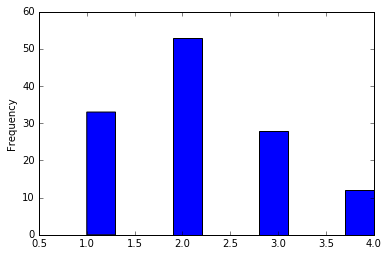

In [3]:
# frequency table for prestige and whether or not someone was admitted
admit_only = admissions_data[admissions_data.admit == 1]
admit_only.describe()
admit_only.plot(x='admit',y='prestige',kind='hist',legend=False)

In [4]:
admit_only.prestige.value_counts()

2.0    53
1.0    33
3.0    28
4.0    12
Name: prestige, dtype: int64

## Part 2. Return of dummy variables

#### 2.1 Create class or dummy variables for prestige 

In [5]:
prestige_dummies = pd.get_dummies(admissions_data.prestige)
print prestige_dummies

     1.0  2.0  3.0  4.0
0    0.0  0.0  1.0  0.0
1    0.0  0.0  1.0  0.0
2    1.0  0.0  0.0  0.0
3    0.0  0.0  0.0  1.0
4    0.0  0.0  0.0  1.0
5    0.0  1.0  0.0  0.0
6    1.0  0.0  0.0  0.0
7    0.0  1.0  0.0  0.0
8    0.0  0.0  1.0  0.0
9    0.0  1.0  0.0  0.0
10   0.0  0.0  0.0  1.0
11   1.0  0.0  0.0  0.0
12   1.0  0.0  0.0  0.0
13   0.0  1.0  0.0  0.0
14   1.0  0.0  0.0  0.0
15   0.0  0.0  1.0  0.0
16   0.0  0.0  0.0  1.0
17   0.0  0.0  1.0  0.0
18   0.0  1.0  0.0  0.0
19   1.0  0.0  0.0  0.0
20   0.0  0.0  1.0  0.0
21   0.0  1.0  0.0  0.0
22   0.0  0.0  0.0  1.0
23   0.0  0.0  0.0  1.0
24   0.0  1.0  0.0  0.0
25   1.0  0.0  0.0  0.0
26   1.0  0.0  0.0  0.0
27   0.0  0.0  0.0  1.0
28   0.0  1.0  0.0  0.0
29   1.0  0.0  0.0  0.0
..   ...  ...  ...  ...
370  0.0  1.0  0.0  0.0
371  0.0  0.0  1.0  0.0
372  1.0  0.0  0.0  0.0
373  1.0  0.0  0.0  0.0
374  0.0  1.0  0.0  0.0
375  0.0  0.0  0.0  1.0
376  0.0  1.0  0.0  0.0
377  0.0  1.0  0.0  0.0
378  0.0  0.0  1.0  0.0
379  0.0  1.0  0

#### 2.2 When modeling our class variables, how many do we need? 



Answer: For the prestige class variables we need 3 out of the 4 in order to avoid the problem of multicollinearity. In this case we will remove class 4 because it is the least significant.

## Part 3. Hand calculating odds ratios

Develop your intuition about expected outcomes by hand calculating odds ratios.

In [6]:
cols_to_keep = ['admit', 'gre', 'gpa']
handCalc = admissions_data[cols_to_keep].join(prestige_dummies.ix[:, 1:4])
print handCalc.head()

   admit    gre   gpa  1.0  2.0  3.0  4.0
0      0  380.0  3.61  0.0  0.0  1.0  0.0
1      1  660.0  3.67  0.0  0.0  1.0  0.0
2      1  800.0  4.00  1.0  0.0  0.0  0.0
3      1  640.0  3.19  0.0  0.0  0.0  1.0
4      0  520.0  2.93  0.0  0.0  0.0  1.0


In [7]:
#crosstab prestige 1 admission 
# frequency table cutting prestige and whether or not someone was admitted

In [8]:
admissions_data.prestige.value_counts()

2.0    148
3.0    121
4.0     67
1.0     61
Name: prestige, dtype: int64

In [9]:
prestige_1 = admissions_data[admissions_data.prestige == 1]
prestige_1.admit.sum()

33

In [10]:
#Probability of admit for prestige level 1 applicants
33./61

0.5409836065573771

In [11]:
non_prestige_1 = admissions_data[admissions_data.prestige != 1]
non_prestige_1.admit.sum()

93

In [12]:
#Probability of admit for prestige non level 1 applicants
93./336

0.2767857142857143

#### 3.1 Use the cross tab above to calculate the odds of being admitted to grad school if you attended a #1 ranked college

In [13]:
#Odds of being admitted if attended a #1 ranked school
0.5409836065573771/(1-0.5409836065573771)

1.1785714285714288

In [14]:
#The odds are 1.18/1

#### 3.2 Now calculate the odds of admission if you did not attend a #1 ranked college

In [15]:
0.2767857142857143/(1-0.2767857142857143)

0.3827160493827161

In [16]:
#The odds are .38/1

#### 3.3 Calculate the odds ratio

In [17]:
1.18/.38

3.1052631578947367

#### 3.4 Write this finding in a sentenance: 

Answer: The odds of being admitted if one went to a level 1 prestige school is about 3 times higher than if one did not go to a level 1 prestige school.

#### 3.5 Print the cross tab for prestige_4

In [18]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()
model = lm.fit(handCalc[[ 6]], handCalc['admit'])
print lm.coef_

[[-0.80182622]]


#### 3.6 Calculate the OR 

In [19]:
print np.exp(model.coef_)

[[ 0.44850914]]


#### 3.7 Write this finding in a sentence

Answer:As expected, the odds ratio for prestige level 4 schools is the lowest of all the prestige levels.

## Part 4. Analysis

In [20]:
# create a clean data frame for the regression
cols_to_keep = ['admit', 'gre', 'gpa']
data = admissions_data[cols_to_keep].join(prestige_dummies.ix[:, 2:])
print data.head()

   admit    gre   gpa  2.0  3.0  4.0
0      0  380.0  3.61  0.0  1.0  0.0
1      1  660.0  3.67  0.0  1.0  0.0
2      1  800.0  4.00  0.0  0.0  0.0
3      1  640.0  3.19  0.0  0.0  1.0
4      0  520.0  2.93  0.0  0.0  1.0


We're going to add a constant term for our Logistic Regression. The statsmodels function we're going to be using requires that intercepts/constants are specified explicitly.

In [21]:
# manually add the intercept
data['intercept'] = 1.0

#### 4.1 Set the covariates to a variable called train_cols

In [22]:
train_cols=data.iloc[:,1:]

In [23]:
train_cols.head()

,gre,gpa,2.0,3.0,4.0,intercept
0,380.0,3.61,0.0,1.0,0.0,1.0
1,660.0,3.67,0.0,1.0,0.0,1.0
2,800.0,4.00,0.0,0.0,0.0,1.0
3,640.0,3.19,0.0,0.0,1.0,1.0
4,520.0,2.93,0.0,0.0,1.0,1.0


#### 4.2 Fit the model

In [24]:
lm = LogisticRegression()
model = lm.fit(train_cols,data['admit'])

#### 4.3 Print the summary results

In [25]:
print lm.coef_
print lm.intercept_

[[ 0.00188666  0.32452811 -0.6200671  -1.16988125 -1.3847737  -1.09518905]]
[-1.09518905]


#### 4.4 Calculate the odds ratios of the coeffiencents and their 95% CI intervals

hint 1: np.exp(X)

hint 2: conf['OR'] = params
        
           conf.columns = ['2.5%', '97.5%', 'OR']

In [26]:
#Below are the odds rations for the different coefficients
print np.exp(lm.coef_)


[[ 1.00188844  1.38337769  0.53790834  0.3104038   0.25038045  0.33447637]]


#### 4.5 Interpret the OR of Prestige_2

Answer: The OR of Prestige_2 is 0.54. This means that the odds of getting admitted if one went to a tier 2 school decreases by 46%.

#### 4.6 Interpret the OR of GPA

Answer: The odds of being admitted increases by 38% for every 1 unit increase in GPA.

## Part 5: Predicted probablities


As a way of evaluating our classifier, we're going to recreate the dataset with every logical combination of input values. This will allow us to see how the predicted probability of admission increases/decreases across different variables. First we're going to generate the combinations using a helper function called cartesian (above).

We're going to use np.linspace to create a range of values for "gre" and "gpa". This creates a range of linearly spaced values from a specified min and maximum value--in our case just the min/max observed values.

In [27]:
def cartesian(arrays, out=None):
    """
    Generate a cartesian product of input arrays.
    Parameters
    ----------
    arrays : list of array-like
        1-D arrays to form the cartesian product of.
    out : ndarray
        Array to place the cartesian product in.
    Returns
    -------
    out : ndarray
        2-D array of shape (M, len(arrays)) containing cartesian products
        formed of input arrays.
    Examples
    --------
    >>> cartesian(([1, 2, 3], [4, 5], [6, 7]))
    array([[1, 4, 6],
           [1, 4, 7],
           [1, 5, 6],
           [1, 5, 7],
           [2, 4, 6],
           [2, 4, 7],
           [2, 5, 6],
           [2, 5, 7],
           [3, 4, 6],
           [3, 4, 7],
           [3, 5, 6],
           [3, 5, 7]])
    """

    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in xrange(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

In [51]:
# instead of generating all possible values of GRE and GPA, we're going
# to use an evenly spaced range of 10 values from the min to the max 
gres = np.linspace(data['gre'].min(), data['gre'].max(), 10)
print gres
# array([ 220.        ,  284.44444444,  348.88888889,  413.33333333,
#         477.77777778,  542.22222222,  606.66666667,  671.11111111,
#         735.55555556,  800.        ])
gpas = np.linspace(data['gpa'].min(), data['gpa'].max(), 10)
print gpas
# array([ 2.26      ,  2.45333333,  2.64666667,  2.84      ,  3.03333333,
#         3.22666667,  3.42      ,  3.61333333,  3.80666667,  4.        ])


# enumerate all possibilities
combos = pd.DataFrame(cartesian([gres, gpas, [1, 2, 3, 4], [1.]]))

[ 220.          284.44444444  348.88888889  413.33333333  477.77777778
  542.22222222  606.66666667  671.11111111  735.55555556  800.        ]
[ 2.26        2.45333333  2.64666667  2.84        3.03333333  3.22666667
  3.42        3.61333333  3.80666667  4.        ]


In [52]:
combos.head()


,0,1,2,3
0,220.0,2.260000,1.0,1.0
1,220.0,2.260000,2.0,1.0
2,220.0,2.260000,3.0,1.0
3,220.0,2.260000,4.0,1.0
4,220.0,2.453333,1.0,1.0


In [53]:
combos.columns=["gre","gpa","prestige","One"]

In [54]:
combos.head()

,gre,gpa,prestige,One
0,220.0,2.260000,1.0,1.0
1,220.0,2.260000,2.0,1.0
2,220.0,2.260000,3.0,1.0
3,220.0,2.260000,4.0,1.0
4,220.0,2.453333,1.0,1.0


#### 5.1 Recreate the dummy variables

In [55]:
# recreate the dummy variables

# keep only what we need for making predictions

dummies=pd.get_dummies(combos['prestige'])


In [56]:
gre_gpa=combos[['gre','gpa']]
gre_gpa.head()

,gre,gpa
0,220.0,2.260000
1,220.0,2.260000
2,220.0,2.260000
3,220.0,2.260000
4,220.0,2.453333


In [63]:

combos_new = gre_gpa.join(dummies)
combos_new= combos_new[['gre','gpa',2,3,4]]
combos_new.head()

,gre,gpa,2.0,3.0,4.0
0,220.0,2.260000,0.0,0.0,0.0
1,220.0,2.260000,1.0,0.0,0.0
2,220.0,2.260000,0.0,1.0,0.0
3,220.0,2.260000,0.0,0.0,1.0
4,220.0,2.453333,0.0,0.0,0.0


In [60]:
One=combos[['One']]
type (One)

pandas.core.frame.DataFrame

In [71]:
combos_more_new=combos_new.join(One)
combos_more_new

,gre,gpa,2.0,3.0,4.0,One
0,220.0,2.260000,0.0,0.0,0.0,1.0
1,220.0,2.260000,1.0,0.0,0.0,1.0
2,220.0,2.260000,0.0,1.0,0.0,1.0
3,220.0,2.260000,0.0,0.0,1.0,1.0
4,220.0,2.453333,0.0,0.0,0.0,1.0
5,220.0,2.453333,1.0,0.0,0.0,1.0
6,220.0,2.453333,0.0,1.0,0.0,1.0
7,220.0,2.453333,0.0,0.0,1.0,1.0
8,220.0,2.646667,0.0,0.0,0.0,1.0
9,220.0,2.646667,1.0,0.0,0.0,1.0


#### 5.2 Make predictions on the enumerated dataset

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

In [70]:
lm = LogisticRegression()
model = lm.fit(train_cols,data['admit'])
actuals = lm.predict(combos_more_new) 
probas = lm.predict_proba(combos_more_new)
print probas

[[ 0.73921249  0.26078751]
 [ 0.84049914  0.15950086]
 [ 0.90130067  0.09869933]
 [ 0.91883729  0.08116271]
 [ 0.72693702  0.27306298]
 [ 0.83190717  0.16809283]
 [ 0.89557704  0.10442296]
 [ 0.91403362  0.08596638]
 [ 0.71430705  0.28569295]
 [ 0.82294987  0.17705013]
 [ 0.88956216  0.11043784]
 [ 0.90897381  0.09102619]
 [ 0.70133292  0.29866708]
 [ 0.81362219  0.18637781]
 [ 0.88324598  0.11675402]
 [ 0.90364758  0.09635242]
 [ 0.68802692  0.31197308]
 [ 0.80392018  0.19607982]
 [ 0.87661867  0.12338133]
 [ 0.89804465  0.10195535]
 [ 0.67440334  0.32559666]
 [ 0.7938411   0.2061589 ]
 [ 0.86967069  0.13032931]
 [ 0.89215479  0.10784521]
 [ 0.6604784   0.3395216 ]
 [ 0.78338352  0.21661648]
 [ 0.86239286  0.13760714]
 [ 0.88596788  0.11403212]
 [ 0.6462703   0.3537297 ]
 [ 0.77254746  0.22745254]
 [ 0.85477649  0.14522351]
 [ 0.879474    0.120526  ]
 [ 0.63179908  0.36820092]
 [ 0.76133449  0.23866551]
 [ 0.84681344  0.15318656]
 [ 0.87266345  0.12733655]
 [ 0.61708661  0.38291339]
 

#### 5.3 Interpret findings for the last 4 observations

*The probabilities of the observations being admitted decreases for the last four observations, going from 65% chance of being admitted to 32% chance of being admitted. This is based on my understanding that the numbers in the second column of the output array represent the probability of being admitted. The probabilities of admit for the last 4 observations most likely decreases because the prestige levels gradually decrease from 1 to 4 while the gre and gpa scores stay the same.

Answer: 

## Bonus

Plot the probability of being admitted into graduate school, stratified by GPA and GRE score.